In [1]:
import seaborn as sns
import pandas as pd
import numpy as numpy

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df[df['species']!= 'setosa']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df['species']=df['species'].map({'versicolor':0, 'virginica':1}).fillna(0)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### split data into dependent and independent variable

In [8]:
x =df.iloc[:,:-1]
y =df.iloc[:,-1]

In [9]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=y.fillna(0)

In [11]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: species, Length: 150, dtype: float64

### now train test split from sklearn model


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet'],
              'C':[1,2,3,4,5,6,10,20,30,40,50],
                'max_iter':[100,200,300,400,500]}

In [16]:
classifier_regressor=GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)

In [17]:
classifier_regressor.fit(x_train, y_train)

d:\python\numpy\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
550 fits failed out of a total of 825.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python\numpy\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\python\numpy\myenv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\python\numpy\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver = _check_sol

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [18]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [19]:
print(classifier_regressor.best_score_)

0.9458498023715414


In [20]:
# predictions
y_pred=classifier_regressor.predict(x_test)

In [21]:
# accuracy score
from sklearn.metrics import accuracy_score, classification_report

In [22]:
score = accuracy_score(y_test, y_pred)
print(score)

1.0


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



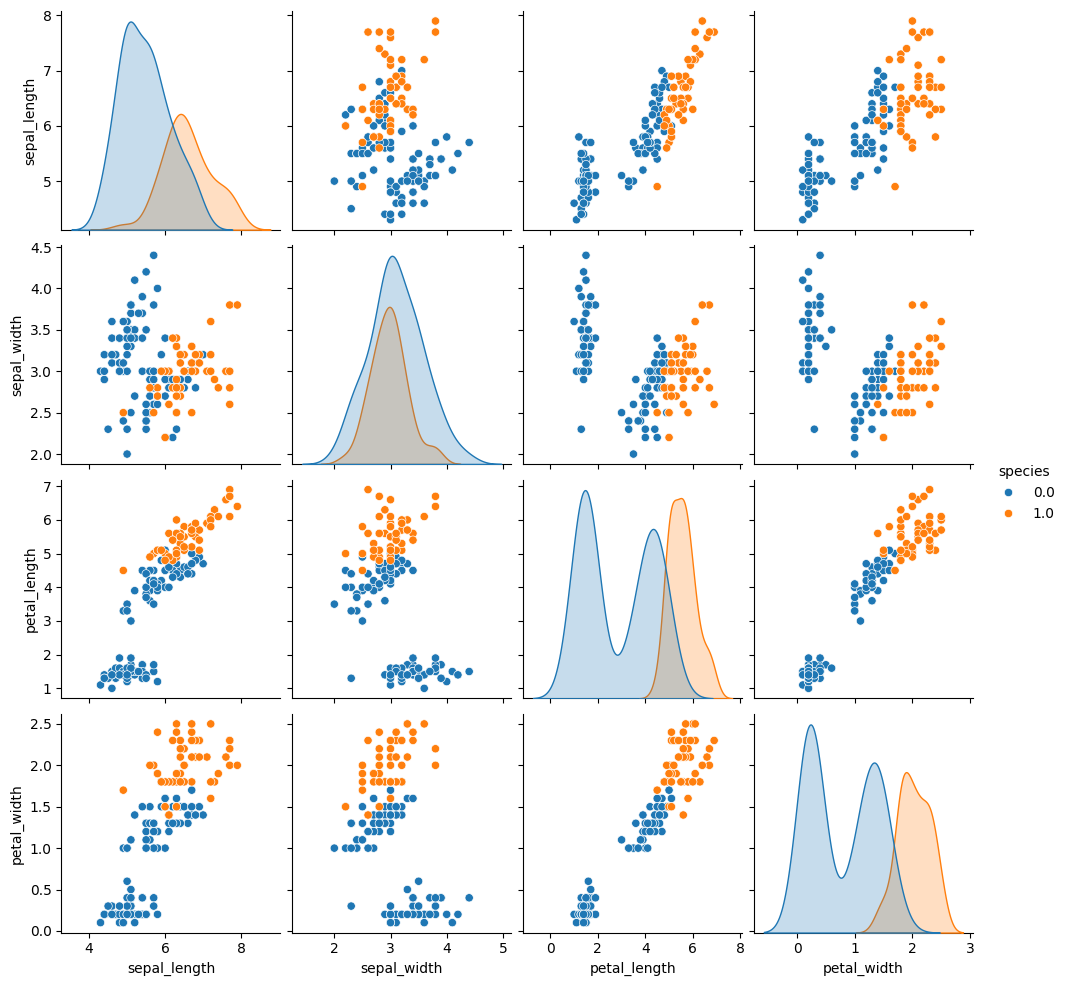

In [24]:
# EDA 
sns.pairplot(df, hue='species')

In [25]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,0.769445
species,0.638020,-0.135645,0.721011,0.769445,1.000000
